# Nifty 50 Index Price Prediction Project

## Introduction

Welcome to the Nifty 50 Index Price Prediction project! In this notebook, we will explore the exciting field of time series analysis and forecasting by working with historical data of the Nifty 50 Index. The Nifty 50 Index is a stock market index representing the performance of 50 well-established and financially sound companies listed on the National Stock Exchange (NSE) of India.The NIFTY 50 is a benchmark Indian stock market index that represents the weighted average of 50 of the largest Indian companies listed on the National Stock Exchange

## Dataset Description

- The dataset used for this analysis contains daily closing stock prices of Amazon from 2008 up until mid 2023.The data includes both the date and the corresponding closing price. 
The dataset is sourced from reliable financial databases and has been cleaned and preprocessed for analysis.

### Features
- Date: The date of the trading day.
- Open: The opening price of Amazon's stock on that particular trading day.
- High: The highest price of Amazon's stock on that particular trading day.
- Low: The lowest price of Amazon's stock on that particular trading day.
- Close: The closing price of Amazon's stock on that particular trading day.
- Adj Close: The adjusted closing price of Amazon's stock on that particular trading day.
- Volume: The trading volume of Amazon's stock on that particular trading day.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import warnings
from statsmodels.tsa.stattools import adfuller,kpss
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")
%matplotlib inline
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (16, 8)

In [2]:
stock_symbol = "^NSEI"  
stock_data = yf.download(stock_symbol, start="2008-1-1", end="2023-5-1")

[*********************100%***********************]  1 of 1 completed


In [3]:
df = stock_data.copy()

In [4]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-01-01,6136.750000,6165.350098,6109.850098,6144.350098,6144.350098,0
2008-01-02,6144.700195,6197.000000,6060.850098,6179.399902,6179.399902,0
2008-01-03,6184.250000,6230.149902,6126.399902,6178.549805,6178.549805,0
2008-01-04,6179.100098,6300.049805,6179.100098,6274.299805,6274.299805,0
2008-01-07,6271.000000,6289.799805,6193.350098,6279.100098,6279.100098,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3754 entries, 2008-01-01 to 2023-04-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3754 non-null   float64
 1   High       3754 non-null   float64
 2   Low        3754 non-null   float64
 3   Close      3754 non-null   float64
 4   Adj Close  3754 non-null   float64
 5   Volume     3754 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 205.3 KB


In [6]:
print(f'There are {df.shape[0]} days in the whole Stock Data')

There are 3754 days in the whole Stock Data


#### Always sort the date and time and set it to the format of month-date-year if data not taken by Scrapping.

In [7]:
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month']= df['Date'].dt.month
df['Weekday']= df['Date'].dt.weekday

df.set_index('Date',inplace = True)

In [8]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday
Date,,,,,,,,,
2023-04-24,17707.550781,17754.500000,17612.500000,17743.400391,17743.400391,255700,2023,4,0
2023-04-25,17761.550781,17807.449219,17716.849609,17769.250000,17769.250000,297400,2023,4,1
2023-04-26,17767.300781,17827.750000,17711.199219,17813.599609,17813.599609,233000,2023,4,2
2023-04-27,17813.099609,17931.599609,17797.900391,17915.050781,17915.050781,241400,2023,4,3
2023-04-28,17950.400391,18089.150391,17885.300781,18065.000000,18065.000000,290300,2023,4,4


## Visualization

In [9]:
df_yearly = df.groupby('Year').mean()
df_monthly = df.groupby('Month').mean()
df['Extreme_diff'] = df['High'] - df['Low']

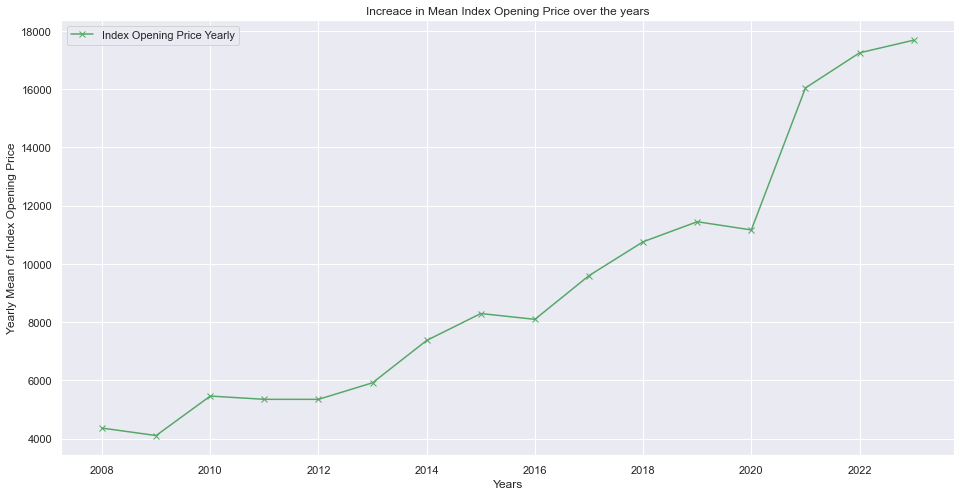

In [10]:
plt.plot(df_yearly['Open'],'x-g',label = "Index Opening Price Yearly")
#x - b (x=  specifies that the data points should be marked with 'x' markers, - = Solid Line,b = Blue Color )
plt.xlabel('Years')
plt.ylabel('Yearly Mean of Index Opening Price')
plt.title('Increace in Mean Index Opening Price over the years')
plt.legend()
plt.show()

#### Price Low and Price High Difference in Covid19 Time to See Price Fluctuation Overview

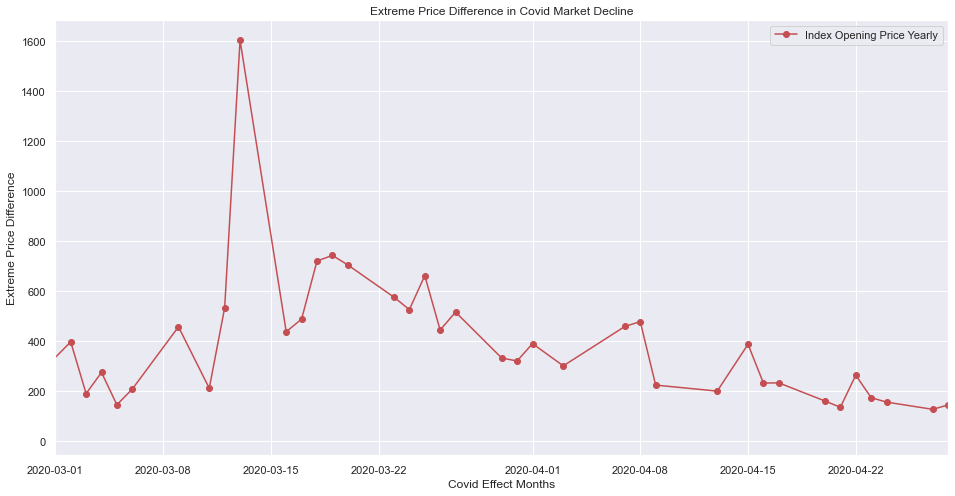

In [11]:
plt.plot(df['Extreme_diff'], 'o-r', label="Index Opening Price Yearly")
plt.xlim(pd.Timestamp('2020-03-1'), pd.Timestamp('2020-04-28'))
plt.xlabel('Covid Effect Months')
plt.ylabel('Extreme Price Difference')
plt.title('Extreme Price Difference in Covid Market Decline')
plt.legend()
plt.show()

#### Closing Price Action Throughout the Chart

<Axes: xlabel='Close', ylabel='Density'>

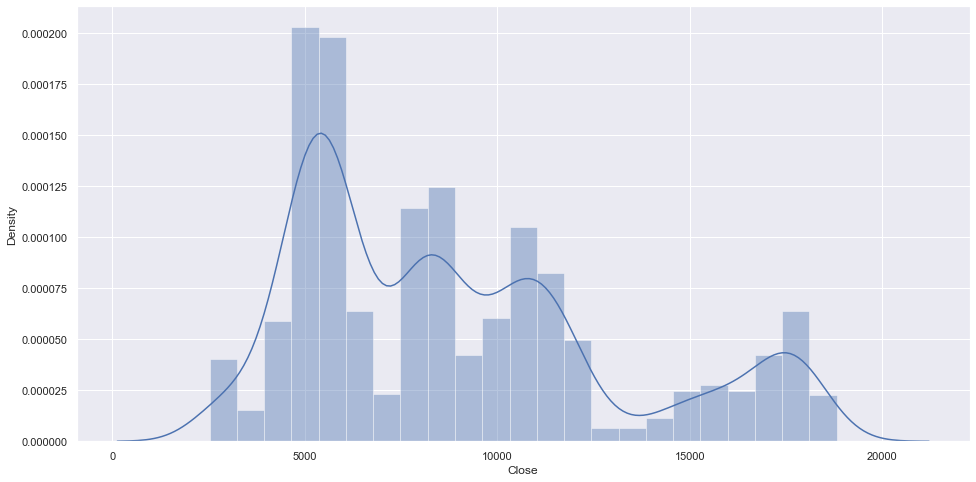

In [12]:
sns.distplot(df['Close'],kde = True)

#### Price Action in Recent Month

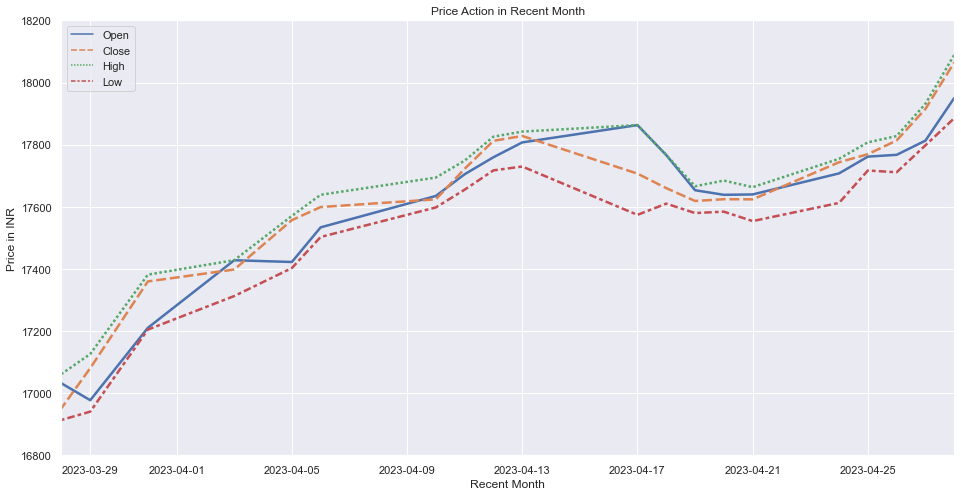

In [13]:
price_df = df[['Open', 'Close', 'High', 'Low']]
sns.lineplot(data=price_df,linewidth=2.5)
plt.xlim(pd.Timestamp('2023-03-28'), pd.Timestamp('2023-04-28'))
plt.ylim(16800,18200)
plt.title("Price Action in Recent Month")
plt.xlabel("Recent Month")
plt.ylabel("Price in INR")
plt.show()

#### Volumes Traded Throughout the Chart Time

<Axes: xlabel='Month', ylabel='Volume'>

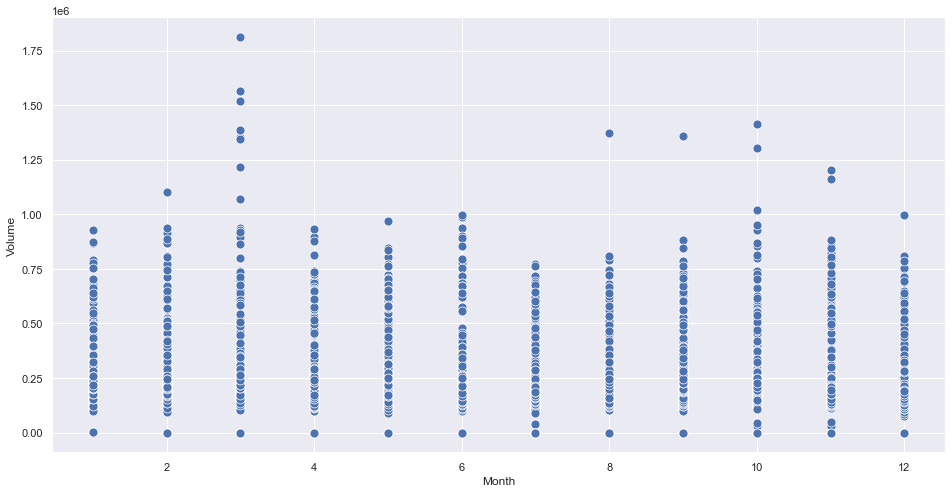

In [14]:
sns.scatterplot(y = df['Volume'],x = df['Month'],data=df,s = 80)

- As we can Analyse the Highest Volume Traded in March Month which can be due to the Covid19 Market Crash.

**What was the Impact of Covid 19 on Nifty50 Index?**

In [15]:
df['2020-06-11':'2020-11-11']

,Open,High,Low,Close,Adj Close,Volume,Year,Month,Weekday,Extreme_diff
Date,,,,,,,,,,
2020-06-11,10094.099609,10112.049805,9885.049805,9902.000000,9902.000000,715500,2020,6,3,227.000000
2020-06-12,9544.950195,9996.049805,9544.349609,9972.900391,9972.900391,796300,2020,6,4,451.700195
2020-06-15,9919.349609,9943.349609,9726.349609,9813.700195,9813.700195,716100,2020,6,0,217.000000
2020-06-16,10014.799805,10046.150391,9728.500000,9914.000000,9914.000000,899900,2020,6,1,317.650391
2020-06-17,9876.700195,10003.599609,9833.799805,9881.150391,9881.150391,685400,2020,6,2,169.799805
...,...,...,...,...,...,...,...,...,...,...
2020-11-05,12062.400391,12131.099609,12027.599609,12120.299805,12120.299805,632500,2020,11,3,103.500000
2020-11-06,12156.650391,12280.400391,12131.849609,12263.549805,12263.549805,576800,2020,11,4,148.550781
2020-11-09,12399.400391,12474.049805,12367.349609,12461.049805,12461.049805,553400,2020,11,0,106.700195


In [16]:
#As Covid19 Crash Happened in 09 March 2020 which Lasted Till July we will take Data untill September
df_before = df['2020-01-01':'2020-03-9']
df_corona = df['2020-03-9':'2020-06-11']
df_recovery = df['2020-06-11':'2020-11-11']

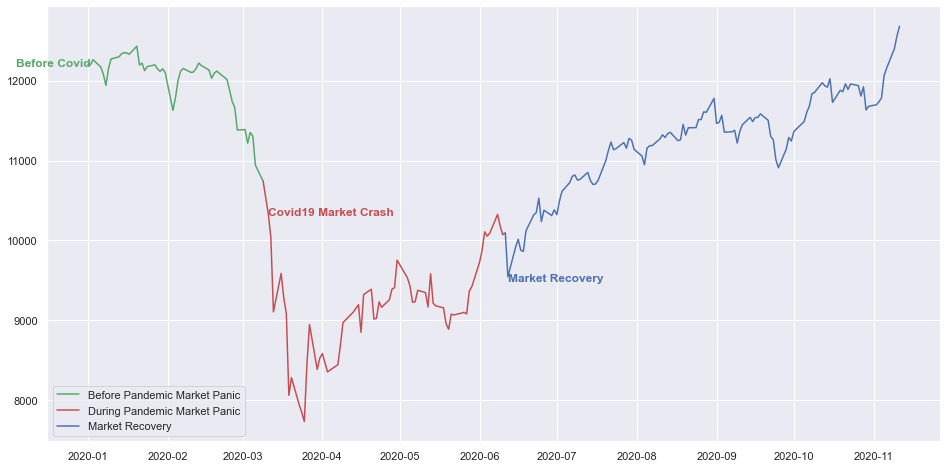

In [17]:
# As we will be using Opening Price as we analysing impact of a Pandemic.
plt.plot(df_before['Open'],'g',label = "Before Pandemic Market Panic")
plt.plot(df_corona['Open'],'r',label = "During Pandemic Market Panic")
plt.plot(df_recovery['Open'],'b',label = "Market Recovery")

plt.text(df_before.index[1], df_before['Open'][1] + 15, "Before Covid", color='g', 
         fontsize=12, weight='bold', verticalalignment='center', horizontalalignment='right')

plt.text(df_corona.index[1], df_corona['Open'][1] + 15,"Covid19 Market Crash", color='r', 
         fontsize=12, weight='bold', verticalalignment='center')

plt.text(df_recovery.index[1], df_recovery['Open'][1] - 15, "Market Recovery", color='b', 
         fontsize=12, weight='bold', verticalalignment='center')

plt.legend()
plt.show()

#### Declined due to 
- The Nifty represents the Top 50 Companies across diverse sectors like Pharma, Infra, Healthcare, Automobile, Energy, and more.

- The rise and fall of the Nifty50 Index mirror the collective impact of market sentiments on the stock prices of these diverse companies.

- The announcement of Covid-19 as a pandemic sparked a significant surge in pessimism among investors. This led to a substantial decline in market sentiment, particularly affecting companies whose supply chain management faced challenges due to Covid restrictions, resulting in operational delays.

- Investor anxiety and a prevailing sense of uncertainty triggered extensive panic selling, involving both individual investors and institutions. This was driven by a shared urgency to protect their investments from potential losses.

**Recovery**
- Starting from July, the market gradually showed signs of improvement. This positive change was attributed to the gradual relaxation of restrictions, enabling companies to return to their usual operations. As a result, there was an increase in the flow of funds within the market.
- The combination of government support, vaccine progress, and improving economic indicators led to improved investor confidence. As confidence grew, investors became more willing to invest in the market, driving prices higher.Resulted in a huge growth in Pharma and Healthcare and Insurance Companies stocks.
- Companies that were well-positioned to benefit from the shift to remote work and digital services experienced growth during the pandemic. Technology stocks and companies in sectors like e-commerce and online entertainment performed well

#### Volume Traded Analysis During Before,During,After Covid

In [18]:
volume_before = df['2020-01-01':'2020-03-09']
volume_corona = df['2020-03-09':'2020-06-11']
volume_recovery = df['2020-06-11':'2020-11-11']

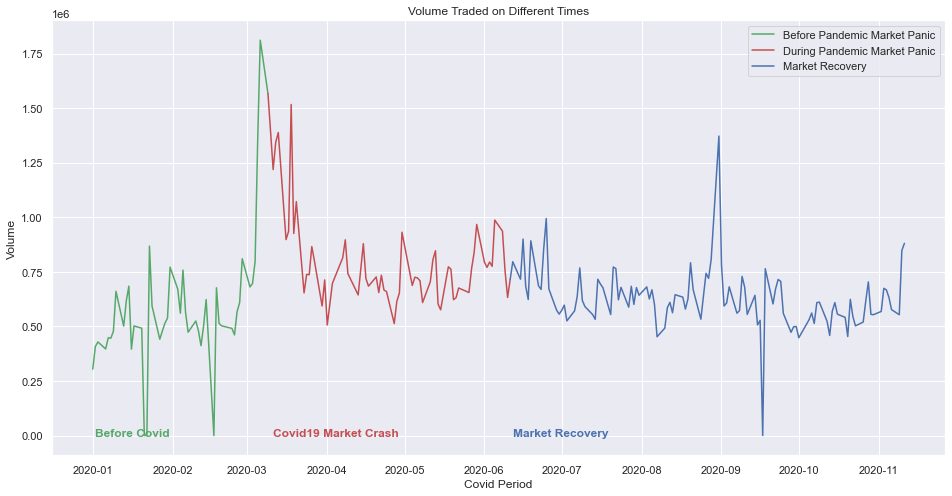

In [19]:
plt.plot(df_before['Volume'],'g',label = "Before Pandemic Market Panic")
plt.plot(df_corona['Volume'],'r',label = "During Pandemic Market Panic")
plt.plot(df_recovery['Volume'],'b',label = "Market Recovery")

plt.text(df_before.index[1], df_before['Open'][1], "Before Covid", color='g', 
         fontsize=12, weight='bold', verticalalignment='center')

plt.text(df_corona.index[1], df_corona['Open'][1] + 15,"Covid19 Market Crash", color='r', 
         fontsize=12, weight='bold', verticalalignment='center')

plt.text(df_recovery.index[1], df_recovery['Open'][1] - 15, "Market Recovery", color='b', 
         fontsize=12, weight='bold', verticalalignment='center')
plt.title("Volume Traded on Different Times")
plt.xlabel("Covid Period")
plt.ylabel("Volume")
plt.legend()
plt.show()

#### Volume Traded Analysis in Covid19 Market Crash
- Market behavior is greatly influenced by investor sentiments. Investors often anticipate future market movements and make trades accordingly, leading to abrupt fluctuations in stock or index trading volumes. Analyzing the chart reveals that the highest trading volumes often occur just before the onset of a market crash.

- Recognizing this trend, investors began to leverage it to their advantage by strategically trading stocks.

#### Volume Traded Analysis of Last 5 Years

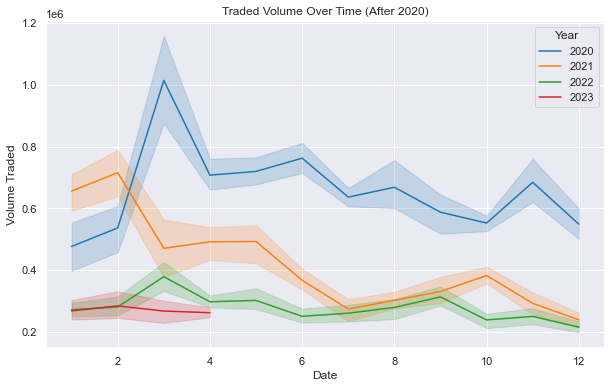

In [20]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['2020-01-01':], x='Month', y='Volume', hue='Year', palette='tab10')
plt.xlabel('Date')
plt.ylabel('Volume Traded')
plt.title('Traded Volume Over Time (After 2020)')
plt.show()


- The peak trading volume observed in the past five years occurred in 2020. This surge was attributed to the market's significant rally, marking the year with the most substantial growth compared to the preceding years.

- An influencing factor was the notable influx of new DeMat Accounts entering the market. This surge was prompted by the swift market downturn followed by a subsequent rise, motivating new participants to engage in the market's dynamic flow.

- However, as the market gradually stabilized and volatility decreased, a substantial number of investors who had entered in 2020 chose to exit. This trend subsequently caused a consistent decrease in the volume traded each year.

In [21]:
log_returns = np.log(df['Close']/df['Close'].shift(1))

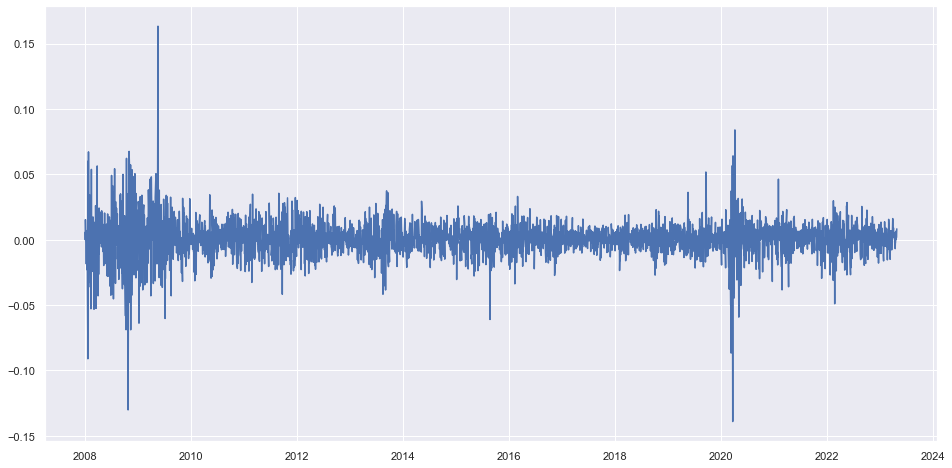

In [22]:
plt.plot(log_returns)

### In this Section we will try to Analysis and Predict the Market Movement with Help of Technical Indicators

In [23]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'])

# Extract only the year component from the 'Date' column
x = stock_data['Date'][stock_data['Date'].dt.year > 2012]

KeyError: 'Date'

In [ ]:
x

In [ ]:
stock_data.head()

In [ ]:
plt.title('Close Price History')
plt.plot(stock_data['Close'],color = '#431ad6',label = 'Nifty 50 Index')
plt.vlines(datetime.date(2020,3,9),0,17500,linestyles='dashed',label = 'Train-Test-Split',colors = '#f71e33')
plt.xlabel('Day Count', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.legend()
plt.show()

#### Divided the Index Stock into Train and Test after 2020 upto 2023 as on March 2020 the stock market experienced an abrupt drop in response to the impact of the COVID-19 pandemic.So the testing will be interesting as after 2020 most of the test data is in a exponential growth period.

#### For Better Prediction We need to remove Noise which is done by generating features we generally use in Stock Price Prediction

In [ ]:
def stock_indicators(data):
    
    #7 and 21 Days Moving Average
    data['MA7'] = data['Close'].rolling(window = 7).mean()
    data['MA21'] = data['Close'].rolling(window = 21).mean()
    
    data['26EMA'] = data['Close'].ewm(span=26).mean()
    data['12EMA'] = data['Close'].ewm(span=12).mean()
    data['MACD'] = (data['12EMA']-data['26EMA'])
    data['Signal_Line'] = data['MACD'].ewm(span=9).mean()
    
    #Bollinger Bands
    data['20MAsd'] = data['Close'].rolling(window = 25).std()
    data['lower_band'] = ((data['Close'].rolling(window= 25).mean()) - (data['20MAsd']*2))
    data['upper_band'] = (data['Close'].rolling(window = 25).mean()) + (data['20MAsd']*2)
    
    
    #Exponential moving average
    data['ema'] = data['Close'].ewm(com=0.3).mean()
    
    #Momentum
    data['Momentum'] = (data['Close'] / data['Close'].shift(300))*100 #As we are analysing the data for more than 1year.
    # Shift usually is in the range of 200-500.

        
    return data
    


**Simple Moving Average (SMA):**
- A Moving Average is a technique that calculates the average value of a set of data points over a specific period. In the context of financial markets, it's commonly used to reduce noise and highlight trends in price data. The calculation involves taking the sum of prices over a certain number of periods and then dividing by that number.

**Exponential Moving Average (EMA):** 
- An Exponential Moving Average is a type of moving average that assigns different weights to different data points, with more weight given to recent data. This makes EMA more responsive to recent price changes compared to SMA. EMA calculations involve an initial EMA value (often the first closing price) and a smoothing factor (alpha) that determines the weight given to the most recent price.
- **EMA(t) = α * Closet(t) + (1 - α) * EMA(t-1)**
- A smaller α(Smoothing Factor) gives more weight to recent data, making the EMA more sensitive to recent changes. Conversely, a larger α gives more weight to historical data, resulting in a smoother EMA curve.(*α = 0.5*)

- Both are Smoothing Technique used for reducing the noise and Identify the Trend.

**Bollinger Bands:**
- Bollinger Bands serve as a tool to establish the upper and lower price levels within which Stock or commodity we are  currently trading. This technique defines a trading range by utilizing Moving Average (SMA) lines(**20 SMA is this case**), along with upper and lower bands. The upper and lower bands are determined by adding and subtracting standard deviations from the Moving Average, making Bollinger Bands a method to gauge volatility in the market.

**Momentum**:
- The rate of change of an asset's price over a specified time period. It indicates the strength and speed of price movement and is used to identify trends and potential shifts in market sentiment
--------------
-  More Information on Few more in below link
- https://www.investopedia.com/articles/active-trading/041814/four-most-commonlyused-indicators-trend-trading.asp

In [ ]:
nifty = stock_indicators(stock_data)

In [ ]:
nifty.head()

In [ ]:
def indicators_plots(data,days):
    plt.figure(figsize = (16,10),dpi = 100)
    shape_0 = data.shape[0]
    xmacd = shape_0 - days
    
    data = data.iloc[-days:]
    x1 = list(data.index)
    
    #Plot the Indicators 
    plt.subplot(2,1,1)
    plt.plot(data['MA7'],label='MA 7', color='#f85c00',linestyle='--')
    plt.plot(data['MA21'],label='MA 21', color='#43a1f7')
    plt.plot(data['Close'],label = 'Closing Price',color = 'b')
    plt.plot(data['lower_band'],label='Bollinger Lower Band', color='#d00f3c',linestyle='--')
    plt.plot(data['upper_band'],label='Bollinger Upper Band', color='#0abd5d',linestyle='--')
    plt.title(f"Nifty 50 Technical Indicators for {days} last days")
    plt.ylabel("Price in INR")
    plt.legend()
    
    
    #MACD and Signal Line with Momentum
    plt.subplot(2,1,2)
    plt.plot(data['MACD'],label='MACD', color='#431ad6',linestyle='--')
    plt.plot(data['Signal_Line'],label='Signal Line', color='purple',linestyle='--')
    plt.hlines(120,xmacd,shape_0,color='r',linestyle='--')
    plt.hlines(-120,xmacd,shape_0,color='r',linestyle='--')
    plt.ylim(-400, 400)
    plt.plot(data['Momentum'],label='Momentum',color = 'b',linestyle ='-')
    plt.title("MACD")
    plt.legend()
    plt.show()
    

In [ ]:
indicators_plots(nifty,500)

### Analysis of Close Price Behavior and Technical Indicators
#### The first subplot provides an insightful analysis of the Close Price graph in relation to various Technical Indicators. It reveals key patterns that can guide trading decisions:

**Bullish and Bearish Trends:** When the 7-day Moving Average (MA) crosses above the 21-day MA, it indicates a bullish trend, suggesting potential upward momentum. Conversely, when the 7-day MA crosses below the 21-day MA, a bearish trend is suggested, indicating a possible downward movement in prices.

**Bollinger Bands:** The interaction between the price and Bollinger Bands offers valuable insights. If the price surpasses the upper Bollinger Band, it could signify an overbought condition, suggesting a potential reversal or correction in the near future. On the other hand, if the price drops below the lower Bollinger Band, it may indicate an oversold condition, often leading to a potential rebound in prices.

#### MACD, Signal Line, and Momentum Analysis
- The second subplot delves into the behavior of the Moving Average Convergence Divergence (MACD) and its Signal Line, in conjunction with the Momentum indicator:

**MACD and Signal Line Dynamics:** By observing the interactions between the MACD and its Signal Line, traders can identify crucial trading signals. Convergences, divergences, and crossovers at specific price levels or trends can serve as strong indicators of potential market movements.

**Trend Reversals and Breakouts:** Notably, the crossing of the MACD and Signal Line often corresponds to trend reversals or breakout points. This information aids traders in making timely decisions, whether it's entering or exiting positions based on these significant events.

By understanding these patterns and relationships between Technical Indicators, traders can make more informed decisions, increasing the likelihood of successful trading strategies.

***************************************************************************************************************************